In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sommaire <a class='anchor' id='S'></a>

## [I, Découverte des données](#I)

## [II, Sélection des donnéees](#II)

## [III, Jonction des données en un dataset](#III)

## [IV, Réduction des datas](#IV)

## [V, Analyse des données](#V)

### [A, Calcul des corrélations entre Région et les autres variables](#VA)
### [B, Calcul des corrélations entre Group de revenu et les autres variables](#VB)
### [C, Préselection d'un liste de pays](#VC)


# I, Découverte des données <a class='anchor' id='I'></a>

### 1, Country Series

In [2]:
country_series = pd.read_csv('EdStatsCountry-Series.csv')

In [3]:
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [4]:
country_series.shape

(613, 4)

In [5]:
country_series.isnull().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

In [6]:
country_series[country_series.duplicated(subset=['CountryCode', 'SeriesCode']) == True]

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3


In [7]:
country_series.DESCRIPTION.head(100).unique()

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

In [8]:
country_series.describe(include='all')

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
count,613,613,613,0.0
unique,211,21,97,NaN
top,GEO,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
freq,18,211,154,NaN
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN


### 2, Country

In [9]:
country = pd.read_csv('EdStatsCountry.csv')

In [10]:
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [11]:
country.shape

(241, 32)

In [12]:
country.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [13]:
country.isnull().sum().sum()

2354

In [14]:
round(country.isnull().sum().sum()/ (country.shape[0] * country.shape[1])*100,2)

30.52

In [15]:
country[country.duplicated('Short Name') == True]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31


In [16]:
country.describe()

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
count,32.00000,107.000000,185.000000,0.0
mean,2001.53125,2008.102804,2010.994595,NaN
std,5.24856,2.616834,2.569675,NaN
min,1987.00000,2000.000000,1995.000000,NaN
25%,1996.75000,2007.500000,2011.000000,NaN
50%,2002.00000,2009.000000,2012.000000,NaN
75%,2005.00000,2010.000000,2012.000000,NaN
max,2012.00000,2010.000000,2012.000000,NaN


In [17]:
country.describe(include='all')

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
count,241,241,241,241,238,215,145,214,214,240,...,181,213,141,160,111,142,107.000000,185.000000,179,0.0
unique,241,241,241,241,238,152,131,7,5,240,...,2,27,60,75,2,35,NaN,NaN,20,NaN
top,GIN,Puerto Rico,Puerto Rico,Puerto Rico,MR,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,MR,...,General Data Dissemination System (GDDS),2011,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 2012",Yes,2010,NaN,NaN,2000,NaN
freq,1,1,1,1,1,23,6,57,55,1,...,110,59,10,15,110,36,NaN,NaN,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2008.102804,2010.994595,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.616834,2.569675,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,1995.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2007.500000,2011.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,2012.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,2012.000000,NaN,NaN


### 3, Data

In [18]:
data = pd.read_csv('EdStatsData.csv')

In [19]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data.shape

(886930, 70)

In [21]:
data.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

In [22]:
data.isnull().sum().sum()

53455179

In [23]:
round(data.isnull().sum().sum() / (data.shape[0]*data.shape[1])*100,2)

86.1

In [24]:
data[data.duplicated(subset=['Country Name', 'Indicator Name']) == True]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69


In [25]:
data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [26]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [27]:
data['Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

In [28]:
len(data['Indicator Name'].unique())

3665

In [29]:
france = data[data['Country Name'] == 'France']

In [30]:
france[france['Indicator Code'] == 'BAR.NOED.1519.FE.ZS']['Indicator Name']

337456    Barro-Lee: Percentage of female population age...
Name: Indicator Name, dtype: object

In [31]:
france['Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

### 4, Foot note

In [32]:
foot_note = pd.read_csv('EdStatsFootNote.csv')

In [33]:
foot_note.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [34]:
foot_note.shape

(643638, 5)

In [35]:
foot_note.isnull().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

In [36]:
foot_note[foot_note.duplicated(subset=['CountryCode', 'SeriesCode', 'Year']) == True]

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4


In [37]:
foot_note.DESCRIPTION.unique()

array(['Country estimation.', 'UIS Estimation',
       'UNESCO Institute for Statistics (UIS) estimate', ...,
       'Uncertainty bound is 91.6 - 109.3',
       'Uncertainty bound is 54.3 - 76',
       'Uncertainty bound is 48.3 - 73.3'], dtype=object)

### 5, Series

In [38]:
series = pd.read_csv('EdStatsSeries.csv')

In [39]:
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
series.shape

(3665, 21)

In [41]:
series.isnull().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

In [42]:
series.isnull().sum().sum()

55203

In [43]:
round(series.isnull().sum().sum() / (series.shape[0]*series.shape[1])*100,2)

71.72

In [44]:
series[series.duplicated(subset='Series Code') == True]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20


In [45]:
series.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [46]:
series.isna().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

In [47]:
series.shape

(3665, 21)

In [48]:
series.describe(include='all')

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
count,3665,3665,3665,2156,3665,0.0,99,314,552,47,...,0.0,14,3665,23,3,215,0.0,0.0,0.0,0.0
unique,3665,37,3665,1169,2060,NaN,1,4,14,3,...,NaN,8,31,2,1,1,NaN,NaN,NaN,NaN
top,LO.SACMEQ.MAT.L5.FE,Learning Outcomes,PASEC: Female 5th grade students reaching the ...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,NaN,Annual,Projections (2010 to 2100),EGRA,Weighted average,...,NaN,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm,NaN,NaN,NaN,NaN
freq,1,1046,1,215,215,NaN,99,308,403,31,...,NaN,3,1269,20,3,215,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### [retour au sommaire](#S)

# II, Sélection des donnéees <a class='anchor' id='II'></a>

Les datasets qui contiennent les données qui vont le plus nous intéresser sont les dataset 'data' et 'country'. <br/>
Le premier contient des informations sur les niveaux d'éducation de chaque pays.<br/>
Le second contient des informations économiques générales sur le pays.

Un rapide tour d'horizon des jeux de données nous montre que ceux-ci sont d'une taille conséquente.
Aussi, avant de les nettoyer, nous allons tenter d'identifier et d'isoler seulement les lignes et colonnes pertinentes pour notre travail d'analyse.

### 1, Le dataset 'data'

Pour le dataset data, l'entreprise pour laquelle nous sommes missionnés propose un service en ligne et s'intéresse à un public de niveau lycée et université.<br/><br/>
Aussi, nous allons rechercher dans la colonne 'indicator name', les mots clefs 'upper secondary' et 'tertiary' et 'internet'.<br/>
Pour encore restreindre notre recherche, nous ajoutons le mot clef 'both sexes' car il n'a pas été demander de faire une distinction homme-femme.<br/>
Enfin, nous allons garder les données les plus récentes pour chaque indicateur trouvé.

In [49]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
data[(data['Indicator Name'].str.contains("upper secondary"))&(data['Indicator Name'].str.contains("both sexes"))]['Indicator Name'].unique()

array(['Adjusted net enrolment rate, upper secondary, both sexes (%)',
       'Africa Dataset: Graduates from accredited pre-service upper secondary teacher training programmes, both sexes (number)',
       'Africa Dataset: Percentage of newly recruited teachers in upper secondary education who are trained, both sexes (%)',
       'Africa Dataset: Percentage of teachers in upper secondary education who are newly recruited, both sexes (%)',
       'Africa Dataset: Ratio of teacher training graduates to teachers in upper secondary education, both sexes',
       'Africa Dataset: Teacher attrition rate from public upper secondary education, both sexes (%)',
       'Enrolment in upper secondary education, both sexes (number)',
       'Enrolment in upper secondary education, private institutions, both sexes (number)',
       'Enrolment in upper secondary education, public institutions, both sexes (number)',
       'Enrolment in upper secondary general, both sexes (number)',
       'Enrolment

In [51]:
liste_secondary = ['Adjusted net enrolment rate, upper secondary, both sexes (%)', 'Teachers in upper secondary education, both sexes (number)','Enrolment in upper secondary education, both sexes (number)', 'Rate of out-of-school youth of upper secondary school age, both sexes (%)', 'Population of the official age for upper secondary education, both sexes (number)', 'Gross enrolment ratio, upper secondary, both sexes (%)']

In [52]:
data[(data['Indicator Name'].str.contains("tertiary"))&(data['Indicator Name'].str.contains("both sexes"))]['Indicator Name'].unique()

array(['Enrolment in post-secondary non-tertiary education, both sexes (number)',
       'Enrolment in post-secondary non-tertiary education, private institutions, both sexes (number)',
       'Enrolment in post-secondary non-tertiary education, public institutions, both sexes (number)',
       'Enrolment in tertiary education per 100,000 inhabitants, both sexes',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)',
       'Enrolment in tertiary education, ISCED 6 programmes, both sexes (number)',
       'Enrolment in tertiary education, ISCED 7 programmes, both sexes (number)',
       'Enrolment in tertiary education, ISCED 8 programmes, both sexes (number)',
       'Graduates from ISCED 5 programmes in tertiary education, both sexes (number)',
       'Graduates from ISCED 6 programmes in tertiary education, both sexes (number)',
       'Graduates from ISCED 7 programmes in ter

In [53]:
liste_tertiary = ['Enrolment in tertiary education, all programmes, both sexes (number)','Gross enrolment ratio, tertiary, both sexes (%)', 'Gross enrolment ratio, primary to tertiary, both sexes (%)', 'Population of the official age for tertiary education, both sexes (number)', 'Teachers in tertiary education programmes, both sexes (number)']

In [54]:
data[data['Indicator Name'].str.contains("Internet")]['Indicator Name'].unique()

array(['Internet users (per 100 people)'], dtype=object)

In [55]:
liste_it = ['Internet users (per 100 people)']

In [56]:
liste_data = liste_secondary + liste_tertiary + liste_it
liste_data

['Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Teachers in upper secondary education, both sexes (number)',
 'Enrolment in upper secondary education, both sexes (number)',
 'Rate of out-of-school youth of upper secondary school age, both sexes (%)',
 'Population of the official age for upper secondary education, both sexes (number)',
 'Gross enrolment ratio, upper secondary, both sexes (%)',
 'Enrolment in tertiary education, all programmes, both sexes (number)',
 'Gross enrolment ratio, tertiary, both sexes (%)',
 'Gross enrolment ratio, primary to tertiary, both sexes (%)',
 'Population of the official age for tertiary education, both sexes (number)',
 'Teachers in tertiary education programmes, both sexes (number)',
 'Internet users (per 100 people)']

In [57]:
data2 = data[data['Indicator Name'].isin(liste_data)]

In [58]:
data2.shape

(2904, 70)

In [59]:
data2.isna().sum()

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
1970              2280
                  ... 
2085              2904
2090              2904
2095              2904
2100              2904
Unnamed: 69       2904
Length: 70, dtype: int64

On se retrouve avec un dataset beaucoup moins conséquent.<br/>
Pour le réduire encore, nous allons le remettre en une dimension et nous garderons l'année la plus récente pour chaque donnée.

In [60]:
data3 = pd.melt(data2, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='Value')

In [61]:
data4 = data3.dropna(axis=0)

In [62]:
data4['year'] = data4.year.astype(int)

<ipython-input-62-e2816c24fa79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['year'] = data4.year.astype(int)


In [63]:
data5 = data4.copy()

In [64]:
data5 = data4.sort_values(by='year', ascending=True)

In [65]:
data5.drop_duplicates(subset=['Country Name', 'Indicator Name'], keep='last', inplace=True)

In [66]:
data5.shape

(2557, 6)

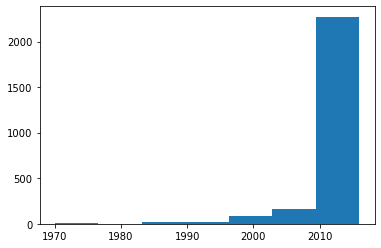

In [67]:
plt.hist(data5.year, bins=7)
#plt.savefig("data_count_1970_2016.png", bbox_inches='tight', transparent=True)
plt.show()

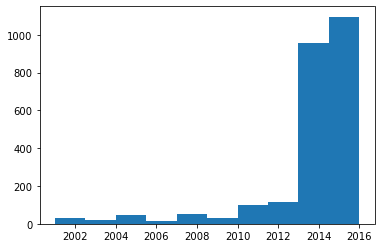

In [68]:
plt.hist(data5[data5.year > 2000].year, bins=10)
#plt.savefig("data_count_2001_2016.png", bbox_inches='tight', transparent=True)
plt.show()

Enfin on voit que la plupart des données collectées sont entre 2010 et 2016. <br/>
Sachant les changements conséquents dont le monde a été témoin en 10 ans, il est préférable de se concentrer sur les données après 2010 afin que des indicateurs trop vieux ne nous induisent pas en erreurs.

In [69]:
data6 = data5[data5.year >= 2010]

In [70]:
data6.shape

(2272, 6)

In [71]:
len(data6['Country Name'].unique())

236

In [72]:
len(data6['Indicator Name'].unique())

12

In [73]:
data6_pt = data6.pivot_table(index='Country Name', values='Indicator Name', aggfunc='count').sort_values('Indicator Name', ascending=False)
data6_pt.head()

,Indicator Name
Country Name,
Latvia,12
Portugal,12
Eritrea,12
Panama,12
El Salvador,12


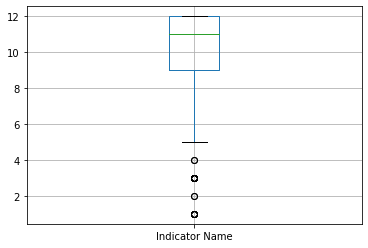

In [74]:
data6_pt.boxplot('Indicator Name')
#plt.savefig("indicator_country.png", bbox_inches='tight', transparent=True)
plt.show()

Nous nous retrouvons avec 1876 données concernant 236 pays et régions du monde.<br/>
Sur le graphique précédant, la médiane de la boîte à moustache est à 9. Sachant que nous avons sélectionné 11 indicateurs, nous pouvons considérer les données comme bien réparties entre les différents individus.<br/>
Ainsi le jeu de données apparaît comme qualitatif et permettant d'effectuer des comparaisons pertinentes.

### 2, Le dataset 'country'

In [75]:
country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [76]:
country2 = country[['Country Code', 'Table Name', 'Region', 'Income Group']]

In [77]:
country2.isna().sum()

Country Code     0
Table Name       0
Region          27
Income Group    27
dtype: int64

In [78]:
country2.shape

(241, 4)

In [79]:
country2.head()

,Country Code,Table Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income: nonOECD


##### [retour au sommaire](#S)

# III, Jonction des données en un dataset <a class='anchor' id='III'></a>

In [80]:
all_data = data6.merge(country2, how='left', on='Country Code')

In [81]:
all_data.shape

(2272, 9)

In [82]:
all_data.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
year                0
Value               0
Table Name          7
Region            290
Income Group      290
dtype: int64

In [83]:
all_data[all_data['Table Name'].isna()]

,Country Name,Country Code,Indicator Name,Indicator Code,year,Value,Table Name,Region,Income Group
1523,British Virgin Islands,VGB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,2015,827.000000,NaN,NaN,NaN
1548,British Virgin Islands,VGB,"Gross enrolment ratio, primary to tertiary, bo...",SE.TOT.ENRR,2015,83.584503,NaN,NaN,NaN
1549,British Virgin Islands,VGB,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,2015,79.926109,NaN,NaN,NaN
1567,British Virgin Islands,VGB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,2015,41.641491,NaN,NaN,NaN
1569,British Virgin Islands,VGB,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2015,1986.000000,NaN,NaN,NaN
1570,British Virgin Islands,VGB,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,2015,87.000000,NaN,NaN,NaN
2067,British Virgin Islands,VGB,Population of the official age for upper secon...,SP.SEC.UTOT.IN,2016,822.000000,NaN,NaN,NaN


In [84]:
all_data2 = all_data[~all_data['Table Name'].isna()]

In [85]:
all_data2[all_data2['Region'].isna()]['Country Name'].unique()

array(['East Asia & Pacific (excluding high income)',
       'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa',
       'European Union', 'East Asia & Pacific', 'Arab World',
       'OECD members', 'Nauru', 'Upper middle income', 'South Asia',
       'World', 'Heavily indebted poor countries (HIPC)',
       'Europe & Central Asia (excluding high income)',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean', 'High income',
       'Europe & Central Asia', 'Euro area', 'Middle income',
       'Middle East & North Africa (excluding high income)',
       'Middle East & North Africa', 'North America',
       'Low & middle income',
       'Least developed countries: UN classification',
       'Lower middle income', 'Low income', 'Gibraltar'], dtype=object)

In [86]:
all_data3 = all_data2.loc[:,['Country Name', 'Indicator Name', 'year', 'Value', 'Region', 'Income Group']]

In [87]:
all_data3.rename(columns={'Indicator Name': 'indicator_name', 'Country Name': 'country_name', 'Income Group': 'income_group'}, inplace=True)

In [88]:
all_data3.isnull().sum()

country_name        0
indicator_name      0
year                0
Value               0
Region            283
income_group      283
dtype: int64

In [89]:
all_data3.head()

,country_name,indicator_name,year,Value,Region,income_group
0,Montenegro,"Enrolment in tertiary education, all programme...",2010,23786.000000,Europe & Central Asia,Upper middle income
1,Montenegro,"Gross enrolment ratio, tertiary, both sexes (%)",2010,55.344589,Europe & Central Asia,Upper middle income
2,Montenegro,"Gross enrolment ratio, primary to tertiary, bo...",2010,88.662643,Europe & Central Asia,Upper middle income
3,Mauritius,"Teachers in tertiary education programmes, bot...",2010,1100.000000,Sub-Saharan Africa,Upper middle income
4,Nigeria,"Teachers in upper secondary education, both se...",2010,112840.000000,Sub-Saharan Africa,Lower middle income


In [90]:
all_data3.shape

(2265, 6)

In [91]:
len(all_data3.country_name.unique())

235

##### [sommaire](#S)

# IV, Réduction des datas <a class='anchor' id='IV'></a>

On se retrouve avec un dataframe de 2265 ligne et 235 individus.<br/><br/>
Nous allons commencer par séparer les pays des régions du monde.<br/><br/>

Ensuite, nous allons utiliser les données concernant le nombre de lycéens et le taux d'accès à internet pour voir la population potentiellement accessible par pays.

In [92]:
data_region = all_data3[all_data3.Region.isna()]

In [93]:
data_region.country_name.unique()

array(['East Asia & Pacific (excluding high income)',
       'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa',
       'European Union', 'East Asia & Pacific', 'Arab World',
       'OECD members', 'Nauru', 'Upper middle income', 'South Asia',
       'World', 'Heavily indebted poor countries (HIPC)',
       'Europe & Central Asia (excluding high income)',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean', 'High income',
       'Europe & Central Asia', 'Euro area', 'Middle income',
       'Middle East & North Africa (excluding high income)',
       'Middle East & North Africa', 'North America',
       'Low & middle income',
       'Least developed countries: UN classification',
       'Lower middle income', 'Low income', 'Gibraltar'], dtype=object)

In [94]:
data_region.shape

(283, 6)

In [95]:
data_pays = all_data3[~all_data3.Region.isna()]

In [96]:
data_pays.shape

(1982, 6)

In [97]:
len(data_pays.country_name.unique())

208

In [98]:
data_pays_pt = data_pays.pivot_table(index='country_name', values='indicator_name', aggfunc='count').sort_values('indicator_name', ascending=True)
data_pays_pt.indicator_name.value_counts()

12    82
11    29
10    28
9     14
3     14
8     13
7      7
5      6
1      6
6      5
4      2
2      2
Name: indicator_name, dtype: int64

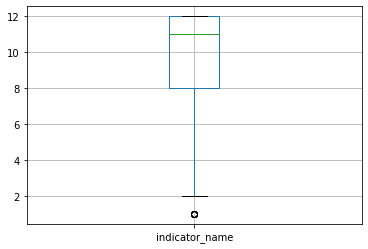

In [99]:
data_pays_pt.boxplot('indicator_name')
#plt.savefig("indicator_country_data_pays.png", bbox_inches='tight', transparent=True)
plt.show()

In [100]:
liste_pays = data_pays_pt[data_pays_pt.indicator_name > 6].index

In [101]:
data_pays = data_pays[data_pays.country_name.isin(liste_pays)]

In [102]:
data_pays.shape

(1862, 6)

On se retrouve avec deux dataframes : <br/>
    <ol>- data_pays qui fait 1862 lignes et 6 colonnes</ol>
    <ol>- data_region qui fait 283 lignes et 5 colonnes</ol>

In [103]:
#data_pays.to_csv('data_pays.csv')
#data_region.to_csv('data_region.csv')

#### [retour au sommaire](#S)

# V, Analyse des données <a class='anchor' id='V'></a>

In [104]:
data_pays.indicator_name.unique()

array(['Enrolment in tertiary education, all programmes, both sexes (number)',
       'Gross enrolment ratio, tertiary, both sexes (%)',
       'Gross enrolment ratio, primary to tertiary, both sexes (%)',
       'Teachers in tertiary education programmes, both sexes (number)',
       'Teachers in upper secondary education, both sexes (number)',
       'Enrolment in upper secondary education, both sexes (number)',
       'Rate of out-of-school youth of upper secondary school age, both sexes (%)',
       'Gross enrolment ratio, upper secondary, both sexes (%)',
       'Adjusted net enrolment rate, upper secondary, both sexes (%)',
       'Internet users (per 100 people)',
       'Population of the official age for tertiary education, both sexes (number)',
       'Population of the official age for upper secondary education, both sexes (number)'],
      dtype=object)

In [105]:
data_pays_pt = data_pays.pivot_table(index='country_name', columns='indicator_name', values='Value')

In [106]:
add_data = data_pays.loc[:,['country_name', 'Region', 'income_group']]

In [107]:
add_data.drop_duplicates(inplace=True)

In [108]:
data_pays_pt = data_pays_pt.merge(add_data, how='left', left_on=data_pays_pt.index, right_on='country_name')

In [109]:
data_pays_pt.shape

(173, 15)

In [110]:
data_pays_pt.isna().sum()

Adjusted net enrolment rate, upper secondary, both sexes (%)                         35
Enrolment in tertiary education, all programmes, both sexes (number)                 12
Enrolment in upper secondary education, both sexes (number)                           4
Gross enrolment ratio, primary to tertiary, both sexes (%)                           22
Gross enrolment ratio, tertiary, both sexes (%)                                      13
Gross enrolment ratio, upper secondary, both sexes (%)                                3
Internet users (per 100 people)                                                       2
Population of the official age for tertiary education, both sexes (number)            1
Population of the official age for upper secondary education, both sexes (number)     0
Rate of out-of-school youth of upper secondary school age, both sexes (%)            38
Teachers in tertiary education programmes, both sexes (number)                       31
Teachers in upper secondary educ

In [111]:
round((data_pays_pt.isna().sum().sum() / (data_pays_pt.shape[0] * data_pays_pt.shape[1]) *100),2)

8.25

In [112]:
data_pays_pt.head()

,"Adjusted net enrolment rate, upper secondary, both sexes (%)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)","Gross enrolment ratio, primary to tertiary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, upper secondary, both sexes (%)",Internet users (per 100 people),"Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Rate of out-of-school youth of upper secondary school age, both sexes (%)","Teachers in tertiary education programmes, both sexes (number)","Teachers in upper secondary education, both sexes (number)",country_name,Region,income_group
0,32.417030,262874.0,968769.0,69.517212,8.662800,42.613129,10.595726,3199607.0,2305137.0,52.02916,11002.0,NaN,Afghanistan,South Asia,Low income
1,70.286232,160527.0,151937.0,86.388161,58.109951,89.460274,66.363445,276247.0,149745.0,18.57938,7367.0,8606.0,Albania,Europe & Central Asia,Upper middle income
2,NaN,1289474.0,1332584.0,80.969070,36.922279,62.721142,42.945527,3492401.0,1796069.0,NaN,53622.0,NaN,Algeria,Middle East & North Africa,Upper middle income
3,3.415430,221037.0,303568.0,67.095230,9.308020,21.098619,13.000000,2374694.0,1736603.0,80.39931,8660.0,14804.0,Angola,Sub-Saharan Africa,Upper middle income
4,43.202511,1792.0,2615.0,82.031067,23.486240,82.024597,73.000000,7935.0,3150.0,15.10204,219.0,224.0,Antigua and Barbuda,Latin America & Caribbean,High income: nonOECD


In [113]:
data_pays_pt.rename(columns={'Internet users (per 100 people)' : 'internet_user %'}, inplace=True)

## A, Calcul des corrélations entre Région et les autres variables <a class='anchor' id='VA'></a>

In [114]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [115]:
for c in data_pays_pt.columns[:-3]:
    df = data_pays_pt.loc[:,['Region', c]]
    df.dropna(inplace=True)
    print("R2 de Region et", c, "= ",round(eta_squared(df.Region, df[c]),2))
    print()

R2 de Region et Adjusted net enrolment rate, upper secondary, both sexes (%) =  0.64

R2 de Region et Enrolment in tertiary education, all programmes, both sexes (number) =  0.12

R2 de Region et Enrolment in upper secondary education, both sexes (number) =  0.13

R2 de Region et Gross enrolment ratio, primary to tertiary, both sexes (%) =  0.5

R2 de Region et Gross enrolment ratio, tertiary, both sexes (%) =  0.52

R2 de Region et Gross enrolment ratio, upper secondary, both sexes (%) =  0.6

R2 de Region et internet_user % =  0.55

R2 de Region et Population of the official age for tertiary education, both sexes (number) =  0.14

R2 de Region et Population of the official age for upper secondary education, both sexes (number) =  0.18

R2 de Region et Rate of out-of-school youth of upper secondary school age, both sexes (%) =  0.54

R2 de Region et Teachers in tertiary education programmes, both sexes (number) =  0.2

R2 de Region et Teachers in upper secondary education, both sexes 

In [116]:
import seaborn as sns

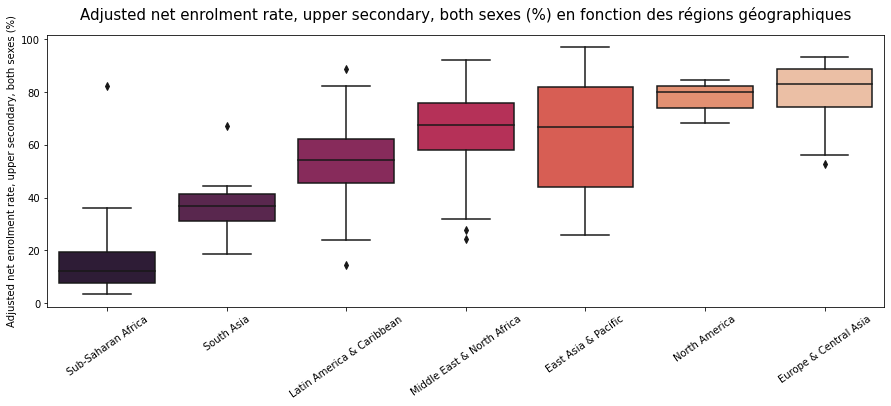

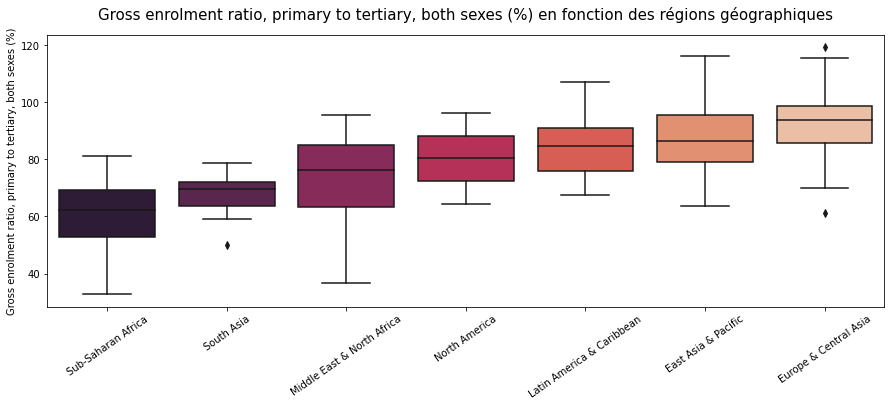

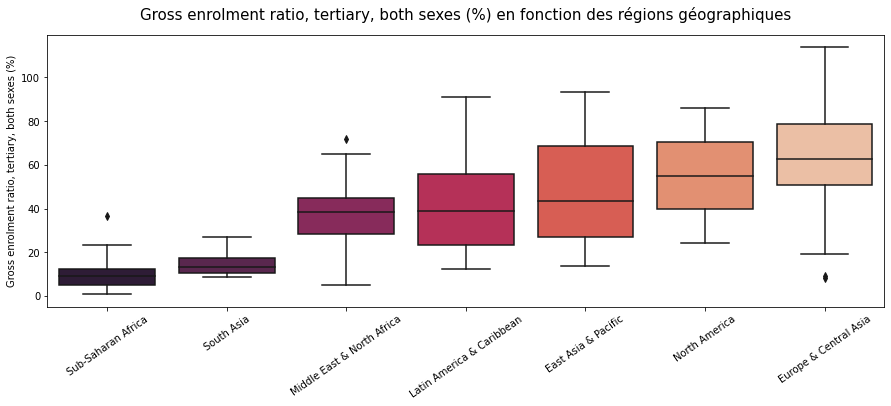

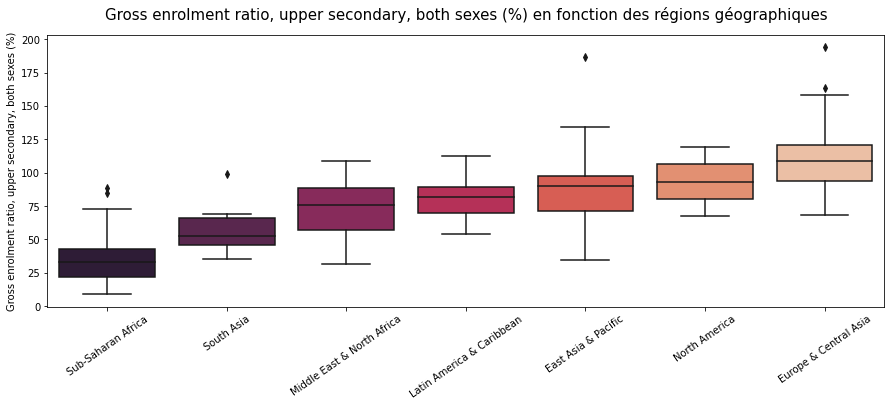

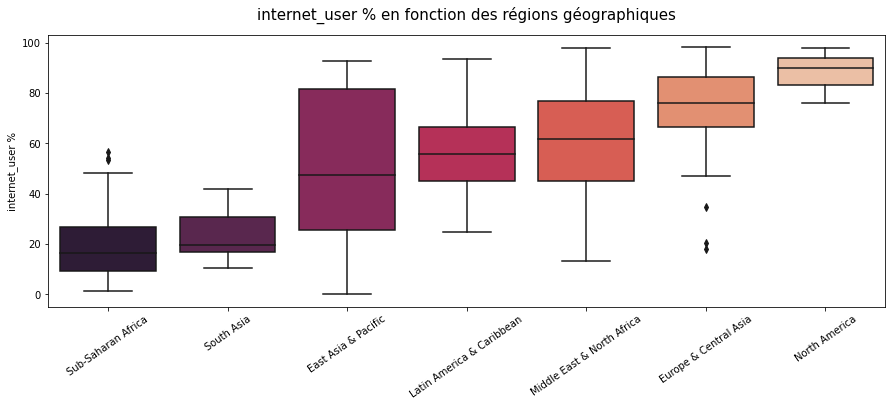

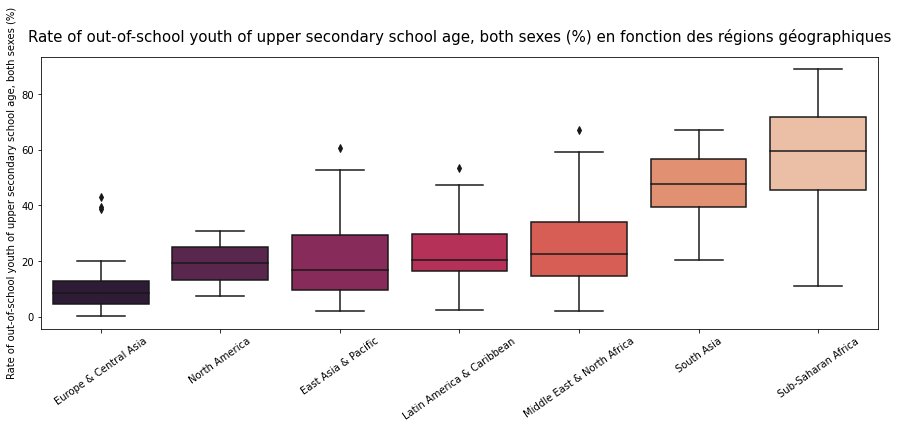

In [117]:
for c in data_pays_pt.columns[:-3]:
    if "%" in c:
        f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
        liste_r = data_pays_pt.groupby('Region')[c].describe().loc[:,'mean'].sort_values().index
        sns.boxplot(x='Region', y=c, data=data_pays_pt, order=liste_r, palette='rocket')
        plt.title('{} en fonction des régions géographiques'.format(c), fontsize=15, pad=15)
        plt.xticks(rotation=35)
        plt.xlabel('')
        #plt.savefig("boxplot_region_"+c+".png", bbox_inches='tight', transparent=True)
        plt.show()

## B, Calcul des corrélations entre Group de revenu et les autres variables <a class='anchor' id='VB'></a>

In [118]:
for c in data_pays_pt.columns[:-3]:
    df = data_pays_pt.loc[:,['income_group', c]]
    df.dropna(inplace=True)
    print("R2 de Income group et", c, "= ",round(eta_squared(df.income_group, df[c]),2))
    print()

R2 de Income group et Adjusted net enrolment rate, upper secondary, both sexes (%) =  0.58

R2 de Income group et Enrolment in tertiary education, all programmes, both sexes (number) =  0.02

R2 de Income group et Enrolment in upper secondary education, both sexes (number) =  0.02

R2 de Income group et Gross enrolment ratio, primary to tertiary, both sexes (%) =  0.62

R2 de Income group et Gross enrolment ratio, tertiary, both sexes (%) =  0.59

R2 de Income group et Gross enrolment ratio, upper secondary, both sexes (%) =  0.65

R2 de Income group et internet_user % =  0.82

R2 de Income group et Population of the official age for tertiary education, both sexes (number) =  0.02

R2 de Income group et Population of the official age for upper secondary education, both sexes (number) =  0.02

R2 de Income group et Rate of out-of-school youth of upper secondary school age, both sexes (%) =  0.65

R2 de Income group et Teachers in tertiary education programmes, both sexes (number) =  0.0

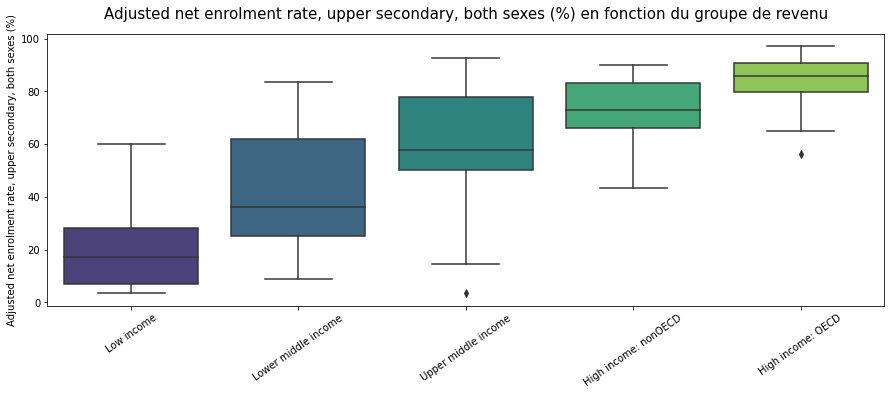

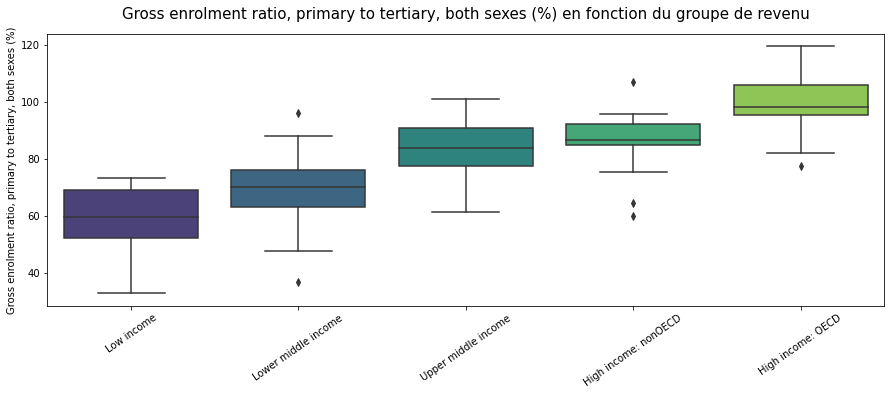

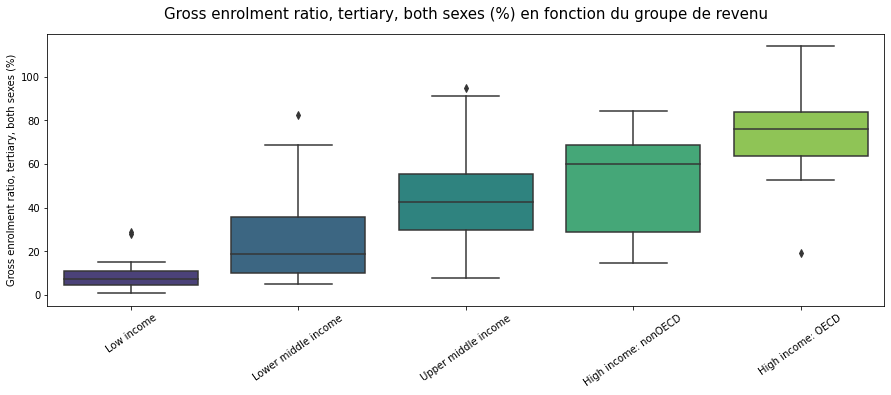

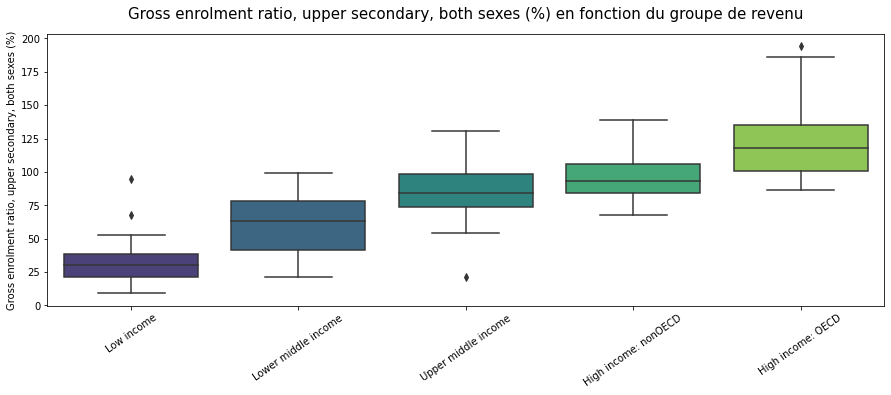

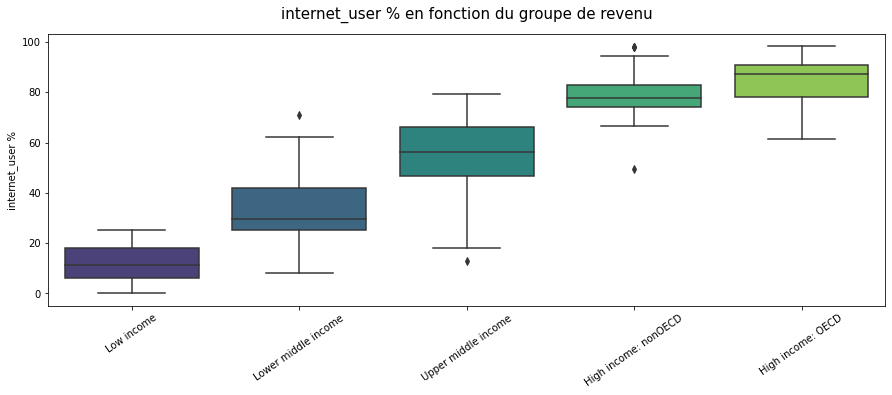

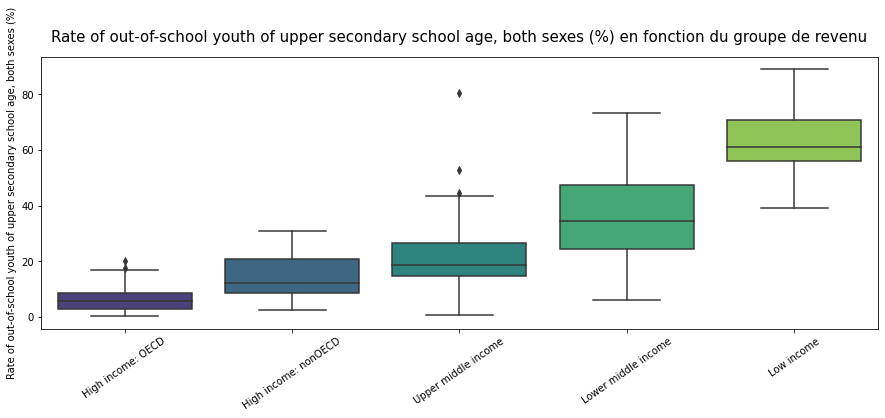

In [119]:
for c in data_pays_pt.columns[:-3]:
    if "%" in c:
        f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
        liste_ig = data_pays_pt.groupby('income_group')[c].describe().loc[:,'mean'].sort_values().index
        sns.boxplot(x='income_group', y=c, data=data_pays_pt, order=liste_ig, palette='viridis')
        plt.title('{} en fonction du groupe de revenu'.format(c), fontsize=15, pad=15)
        plt.xticks(rotation=35)
        plt.xlabel('')
        #plt.savefig("boxplot_income_"+c+".png", bbox_inches='tight', transparent=True)
        plt.show()

In [120]:
data_pays_pt.columns

Index(['Adjusted net enrolment rate, upper secondary, both sexes (%)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Enrolment in upper secondary education, both sexes (number)',
       'Gross enrolment ratio, primary to tertiary, both sexes (%)',
       'Gross enrolment ratio, tertiary, both sexes (%)',
       'Gross enrolment ratio, upper secondary, both sexes (%)',
       'internet_user %',
       'Population of the official age for tertiary education, both sexes (number)',
       'Population of the official age for upper secondary education, both sexes (number)',
       'Rate of out-of-school youth of upper secondary school age, both sexes (%)',
       'Teachers in tertiary education programmes, both sexes (number)',
       'Teachers in upper secondary education, both sexes (number)',
       'country_name', 'Region', 'income_group'],
      dtype='object')

In [121]:
data_pays_pt.groupby('income_group')['Adjusted net enrolment rate, upper secondary, both sexes (%)'].describe()

,count,mean,std,min,25%,50%,75%,max
income_group,,,,,,,,
High income: OECD,25.0,83.546513,9.967533,56.299019,79.888199,85.990601,90.916893,97.071823
High income: nonOECD,22.0,72.827195,13.604522,43.202511,66.048872,73.007351,83.074898,90.123840
Low income,20.0,18.988762,14.931107,3.523080,6.807980,17.204289,28.177495,59.921841
Lower middle income,35.0,42.529119,22.808712,8.744770,25.007629,36.029129,61.765755,83.718147
Upper middle income,36.0,60.155881,20.757144,3.415430,50.048023,57.811029,78.014101,92.717438


In [122]:
data_pays_pt.groupby('income_group')['Gross enrolment ratio, tertiary, both sexes (%)'].describe()

,count,mean,std,min,25%,50%,75%,max
income_group,,,,,,,,
High income: OECD,30.0,73.723170,16.977515,19.40741,63.619561,75.866604,83.892937,113.871788
High income: nonOECD,23.0,51.175899,22.871016,14.51808,28.935915,59.848999,68.503433,84.383781
Low income,28.0,8.838166,6.845453,0.79773,4.482445,7.416750,11.046640,28.894880
Lower middle income,38.0,24.517108,17.732594,4.98506,10.149877,18.973165,35.585210,82.305031
Upper middle income,41.0,44.984973,21.369625,7.98444,29.940901,42.861752,55.344589,94.732300


In [123]:
data_pays_pt.groupby('income_group')['internet_user %'].describe()

,count,mean,std,min,25%,50%,75%,max
income_group,,,,,,,,
High income: OECD,31.0,84.506555,9.723361,61.324253,78.129996,87.237332,90.958894,98.240016
High income: nonOECD,24.0,79.585563,11.182103,49.600000,74.220210,77.828389,83.057325,98.093904
Low income,29.0,12.030246,6.900800,0.000000,6.209974,11.310000,18.246938,25.073304
Lower middle income,41.0,34.441505,14.273726,8.121949,25.366301,29.547163,41.772645,70.999999
Upper middle income,46.0,55.808429,14.514105,13.000000,46.562503,56.185558,66.279762,79.259401


## C, Préselection d'un liste de pays <a class='anchor' id='VC'></a>

Au vu des données de l'énoncé, la capacité d'accès à internet apparaît comme essentielle pour déterminer les pays à cibler. <br/><br/>
Après, plus classiquement, le nombre total de personnes en âge d'être scolarisés au lycée ou en études supérieur est une composante forte dans la décision d'implantation de l'entreprise.

In [124]:
couleur = ['yellowgreen', 'mediumseagreen', 'seagreen', 'steelblue', 'darkslateblue']

In [125]:
color = ['peachpuff', 'sandybrown', 'indianred', 'palevioletred', 'darkmagenta', 'indigo', 'darkblue']

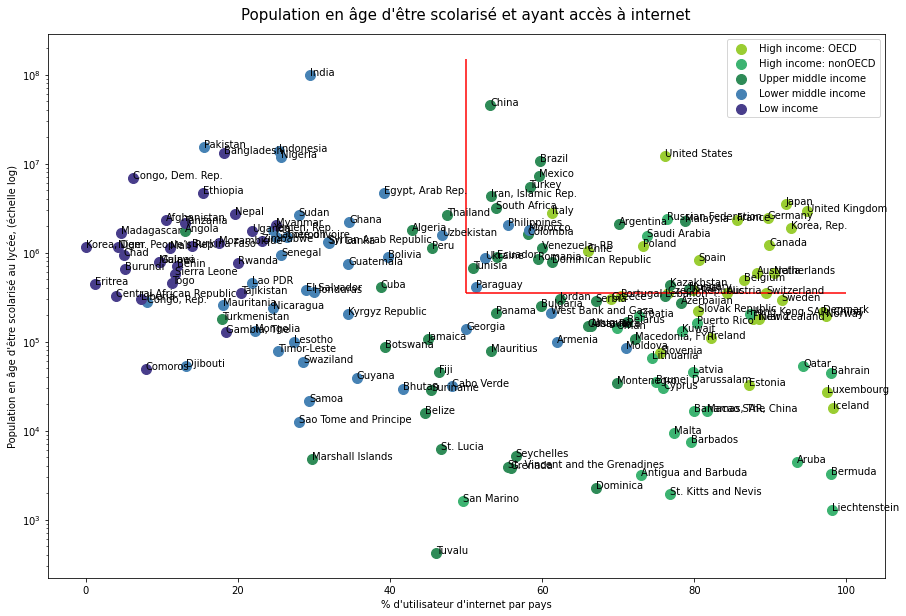

In [126]:
count = 0

fig = plt.figure(figsize=(15,10))
ax = plt.gca()
for c, g in zip(couleur, liste_ig): 
    ax.scatter(data_pays_pt[data_pays_pt.income_group == g]['internet_user %'], data_pays_pt[data_pays_pt.income_group == g]['Population of the official age for upper secondary education, both sexes (number)'], c=c, s=100, label=g)
    ax.set_yscale('log')
    plt.xlabel("% d'utilisateur d'internet par pays")
    plt.ylabel("Population en âge d'être scolarisé au lycée, (échelle log)")
for x,y in zip(data_pays_pt['internet_user %'], data_pays_pt['Population of the official age for upper secondary education, both sexes (number)']):
    label = data_pays_pt.country_name[count]
    plt.annotate(label, (x,y))
    count+=1
plt.legend()
plt.vlines(50, ymin=data_pays_pt['Population of the official age for upper secondary education, both sexes (number)'].median(), ymax=150000000, color='red' )
plt.hlines(data_pays_pt['Population of the official age for upper secondary education, both sexes (number)'].median(), xmin=50, xmax=100, color='red')
plt.title("Population en âge d'être scolarisé et ayant accès à internet", fontsize=15, pad=15)
#plt.savefig("scatter_lycee_internet.png", bbox_inches='tight', transparent=True)
plt.show()

In [127]:
liste_short = data_pays_pt[(data_pays_pt['Population of the official age for upper secondary education, both sexes (number)'] > data_pays_pt['Population of the official age for upper secondary education, both sexes (number)'].median())
            & (data_pays_pt['internet_user %'] > 50) 
            & (data_pays_pt['Population of the official age for tertiary education, both sexes (number)'] > data_pays_pt['Population of the official age for tertiary education, both sexes (number)'].median()) ].country_name.unique()

In [128]:
short_data = data_pays_pt[data_pays_pt.country_name.isin(liste_short)]
short_data.reset_index(inplace=True)

In [129]:
short_couleur = couleur[:-1]
short_liste_ig = liste_ig[:-1]

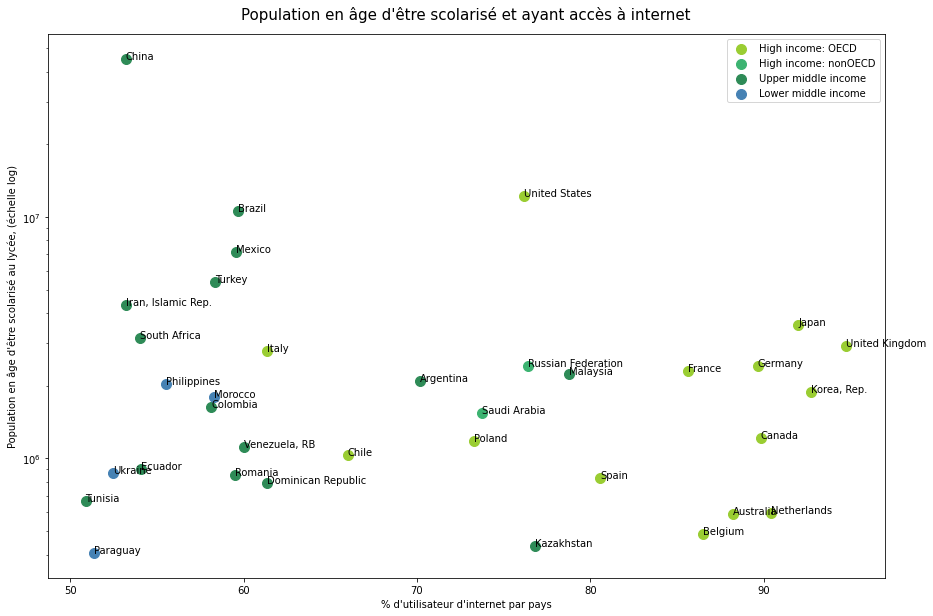

In [130]:
count = 0

fig = plt.figure(figsize=(15,10))
ax = plt.gca()
for c, g in zip(short_couleur, short_liste_ig): 
    ax.scatter(short_data[short_data.income_group == g]['internet_user %'], short_data[short_data.income_group == g]['Population of the official age for upper secondary education, both sexes (number)'], c=c, s=100, label=g)
    ax.set_yscale('log')
    plt.xlabel("% d'utilisateur d'internet par pays")
    plt.ylabel("Population en âge d'être scolarisé au lycée, (échelle log)")
for x,y in zip(short_data['internet_user %'], short_data['Population of the official age for upper secondary education, both sexes (number)']):
    label = short_data.country_name[count]
    plt.annotate(label, (x,y))
    count+=1
plt.legend()
plt.title("Population en âge d'être scolarisé et ayant accès à internet", fontsize=15, pad=15)
#plt.savefig("scatter_lycee_internet_short_list.png", bbox_inches='tight', transparent=True)
plt.show()

In [131]:
short_data.pivot_table(index='income_group', values='index', aggfunc='count', margins=True). sort_values('index', ascending=False)

,index
income_group,
All,35
Upper middle income,15
High income: OECD,14
Lower middle income,4
High income: nonOECD,2


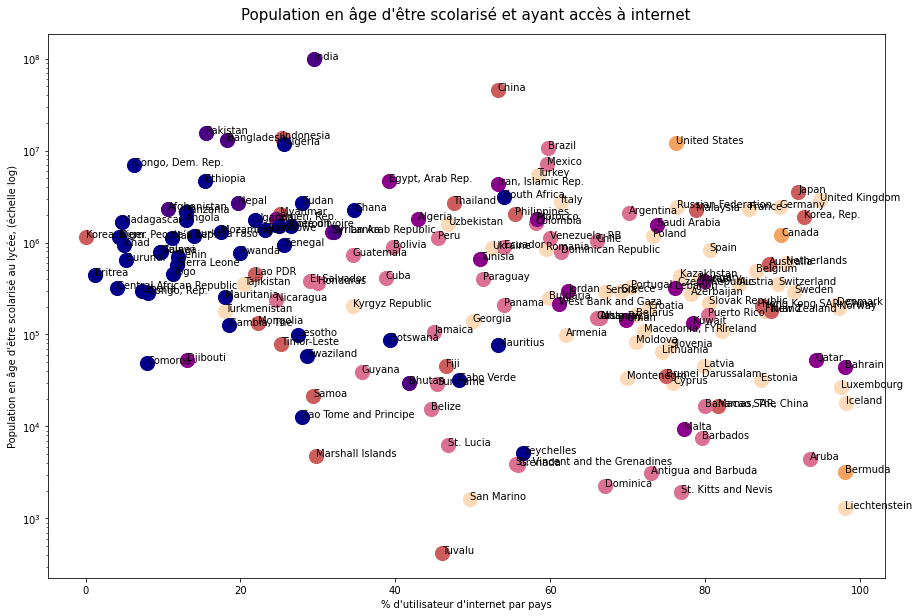

In [132]:
count = 0

fig = plt.figure(figsize=(15,10))
ax = plt.gca()
for c, g in zip(color, liste_r): 
    ax.scatter(data_pays_pt[data_pays_pt.Region == g]['internet_user %'], data_pays_pt[data_pays_pt.Region == g]['Population of the official age for upper secondary education, both sexes (number)'], c=c, s=200)
    ax.set_yscale('log')
    plt.xlabel("% d'utilisateur d'internet par pays")
    plt.ylabel("Population en âge d'être scolarisé au lycée, (échelle log)")
for x,y in zip(data_pays_pt['internet_user %'], data_pays_pt['Population of the official age for upper secondary education, both sexes (number)']):
    label = data_pays_pt.country_name[count]
    plt.annotate(label, (x,y))
    count+=1
plt.title("Population en âge d'être scolarisé et ayant accès à internet", fontsize=15, pad=15)
#plt.savefig("scatter_lycee_internet2.png", bbox_inches='tight', transparent=True)
plt.show()

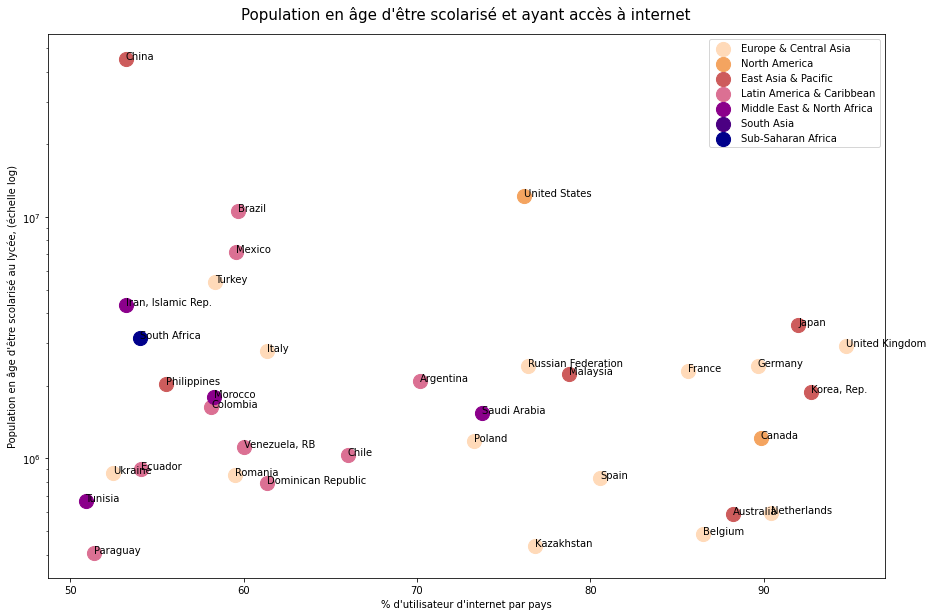

In [133]:
count = 0

fig = plt.figure(figsize=(15,10))
ax = plt.gca()
for c, g in zip(color, liste_r): 
    ax.scatter(short_data[short_data.Region == g]['internet_user %'], short_data[short_data.Region == g]['Population of the official age for upper secondary education, both sexes (number)'], c=c, s=200, label=g)
    ax.set_yscale('log')
    plt.xlabel("% d'utilisateur d'internet par pays")
    plt.ylabel("Population en âge d'être scolarisé au lycée, (échelle log)")
for x,y in zip(short_data['internet_user %'], short_data['Population of the official age for upper secondary education, both sexes (number)']):
    label = short_data.country_name[count]
    plt.annotate(label, (x,y))
    count+=1
plt.legend()
plt.title("Population en âge d'être scolarisé et ayant accès à internet", fontsize=15, pad=15)
#plt.savefig("scatter_lycee_internet2_short_liste.png", bbox_inches='tight', transparent=True)
plt.show()

In [134]:
liste_35 = short_data.pivot_table(index='Region', values='index', aggfunc='count', margins=True). sort_values('index', ascending=False)
liste_35

,index
Region,
All,35
Europe & Central Asia,13
Latin America & Caribbean,9
East Asia & Pacific,6
Middle East & North Africa,4
North America,2
Sub-Saharan Africa,1


In [135]:
total_liste = data_pays_pt.pivot_table(index='Region', values='country_name', aggfunc='count', margins=True)

In [136]:
total_liste

,country_name
Region,
East Asia & Pacific,22
Europe & Central Asia,49
Latin America & Caribbean,34
Middle East & North Africa,18
North America,3
South Asia,7
Sub-Saharan Africa,40
All,173


In [137]:
liste_35 = liste_35.merge(total_liste, how='left', on='Region')

In [138]:
liste_35

,index,country_name
Region,,
All,35,173
Europe & Central Asia,13,49
Latin America & Caribbean,9,34
East Asia & Pacific,6,22
Middle East & North Africa,4,18
North America,2,3
Sub-Saharan Africa,1,40


In [139]:
liste_35['%'] = round((liste_35['index'] / liste_35.country_name)*100,0)

In [140]:
liste_35.rename(columns={'index': 'pays_liste', 'country_name': 'total_pays'})

,pays_liste,total_pays,%
Region,,,
All,35,173,20.0
Europe & Central Asia,13,49,27.0
Latin America & Caribbean,9,34,26.0
East Asia & Pacific,6,22,27.0
Middle East & North Africa,4,18,22.0
North America,2,3,67.0
Sub-Saharan Africa,1,40,2.0


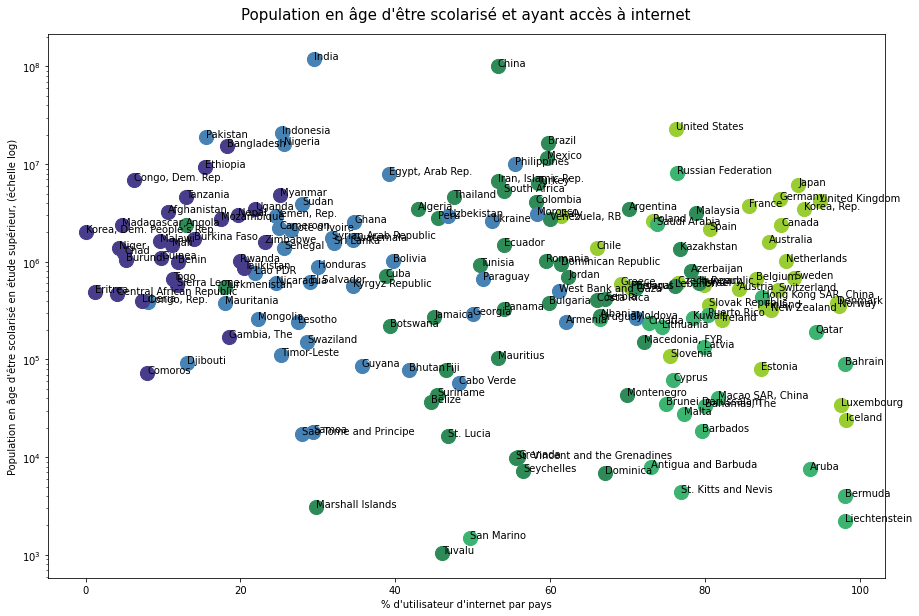

In [141]:
count = 0

fig = plt.figure(figsize=(15,10))
ax = plt.gca()
for c, g in zip(couleur, liste_ig): 
    ax.scatter(data_pays_pt[data_pays_pt.income_group == g]['internet_user %'], data_pays_pt[data_pays_pt.income_group == g]['Population of the official age for tertiary education, both sexes (number)'], c=c, s=200)
    ax.set_yscale('log')
    plt.xlabel("% d'utilisateur d'internet par pays")
    plt.ylabel("Population en âge d'être scolarisé en étude supérieur, (échelle log)")
for x,y in zip(data_pays_pt['internet_user %'], data_pays_pt['Population of the official age for tertiary education, both sexes (number)']):
    label = data_pays_pt.country_name[count]
    plt.annotate(label, (x,y))
    count+=1
plt.title("Population en âge d'être scolarisé et ayant accès à internet", fontsize=15, pad=15)
#plt.savefig("scatter_etude_internet.png", bbox_inches='tight', transparent=True)
plt.show()

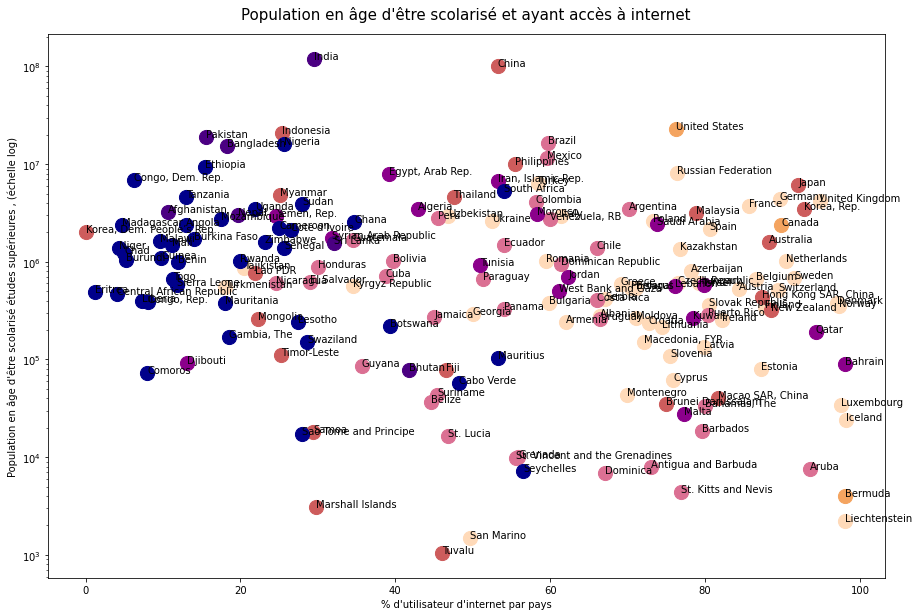

In [142]:
count = 0

fig = plt.figure(figsize=(15,10))
ax = plt.gca()
for c, g in zip(color, liste_r): 
    ax.scatter(data_pays_pt[data_pays_pt.Region == g]['internet_user %'], data_pays_pt[data_pays_pt.Region == g]['Population of the official age for tertiary education, both sexes (number)'], c=c, s=200)
    ax.set_yscale('log')
    plt.xlabel("% d'utilisateur d'internet par pays")
    plt.ylabel("Population en âge d'être scolarisé études supérieures , (échelle log)")
for x,y in zip(data_pays_pt['internet_user %'], data_pays_pt['Population of the official age for tertiary education, both sexes (number)']):
    label = data_pays_pt.country_name[count]
    plt.annotate(label, (x,y))
    count+=1
plt.title("Population en âge d'être scolarisé et ayant accès à internet", fontsize=15, pad=15)
#plt.savefig("scatter_etude_internet2.png", bbox_inches='tight', transparent=True)
plt.show()

In [143]:
liste_short = data_pays_pt[(data_pays_pt['Population of the official age for upper secondary education, both sexes (number)'] > data_pays_pt['Population of the official age for upper secondary education, both sexes (number)'].median())
            & (data_pays_pt['internet_user %'] > 50) 
            & (data_pays_pt['Population of the official age for tertiary education, both sexes (number)'] > data_pays_pt['Population of the official age for tertiary education, both sexes (number)'].median()) ].country_name.unique()

In [144]:
data_pays_pt['Population of the official age for tertiary education, both sexes (number)'].median()

606921.5

In [145]:
len(liste_short)

35

In [146]:
liste_short

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Colombia', 'Dominican Republic', 'Ecuador', 'France',
       'Germany', 'Iran, Islamic Rep.', 'Italy', 'Japan', 'Kazakhstan',
       'Korea, Rep.', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands',
       'Paraguay', 'Philippines', 'Poland', 'Romania',
       'Russian Federation', 'Saudi Arabia', 'South Africa', 'Spain',
       'Tunisia', 'Turkey', 'Ukraine', 'United Kingdom', 'United States',
       'Venezuela, RB'], dtype=object)

In [147]:
liste_short = pd.DataFrame(liste_short)

In [148]:
#liste_short.to_csv('short_list.csv')

Une autre approche consiste à croiser les données des élèves inscrits avec celles de la population en âge d'être inscrit afin de voir les pays dans lesquels les écarts sont les plus importants.<br/><br/>
Même ici, il faudra regarder le taux d'accès à internet.

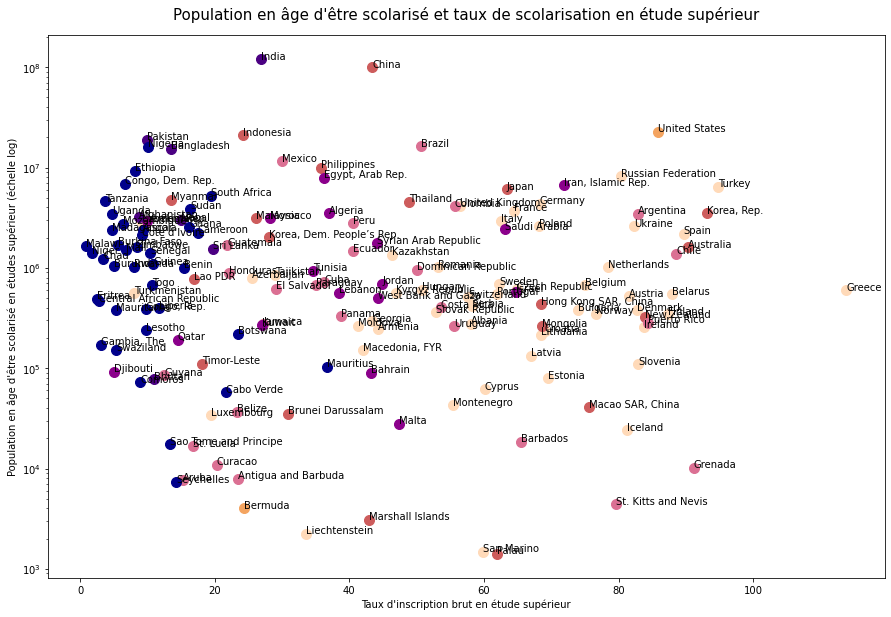

In [149]:
count = 0

fig = plt.figure(figsize=(15,10))
ax = plt.gca()
for c, g in zip(color, liste_r): 
    ax.scatter(data_pays_pt[data_pays_pt.Region == g]['Gross enrolment ratio, tertiary, both sexes (%)'], data_pays_pt[data_pays_pt.Region == g]['Population of the official age for tertiary education, both sexes (number)'], c=c, s=100)
    ax.set_yscale('log')
    plt.xlabel("Taux d'inscription brut en étude supérieur")
    plt.ylabel("Population en âge d'être scolarisé en études supérieur (échelle log)")
for x,y in zip(data_pays_pt['Gross enrolment ratio, tertiary, both sexes (%)'], data_pays_pt['Population of the official age for tertiary education, both sexes (number)']):
    label = data_pays_pt.country_name[count]
    plt.annotate(label, (x,y))
    count+=1
plt.title("Population en âge d'être scolarisé et taux de scolarisation en étude supérieur", fontsize=15, pad=15)
#plt.savefig("scatter_etude_tx.png", bbox_inches='tight', transparent=True)
plt.show()

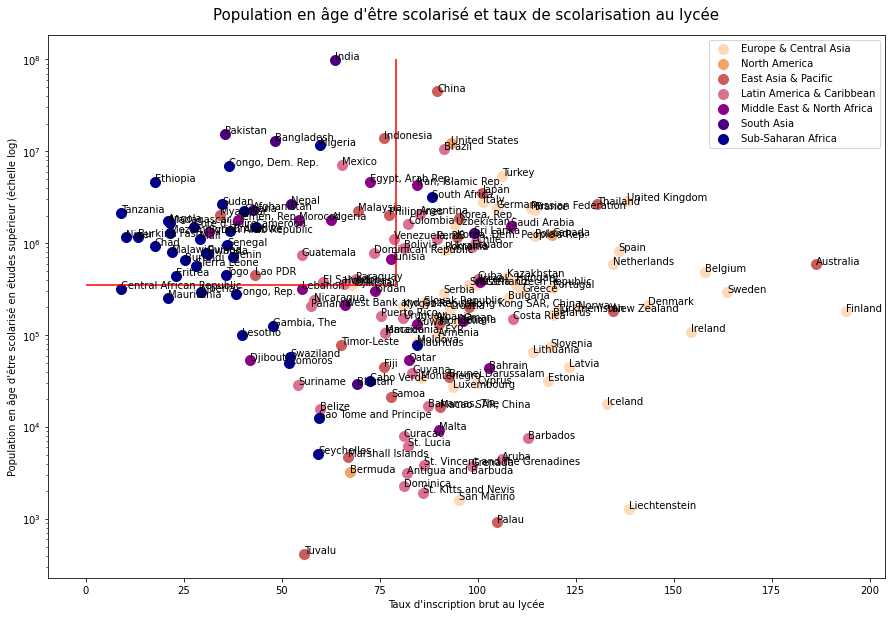

In [150]:
count = 0

fig = plt.figure(figsize=(15,10))
ax = plt.gca()
for c, g in zip(color, liste_r): 
    ax.scatter(data_pays_pt[data_pays_pt.Region == g]['Gross enrolment ratio, upper secondary, both sexes (%)'], data_pays_pt[data_pays_pt.Region == g]['Population of the official age for upper secondary education, both sexes (number)'], c=c, s=100, label=g)
    ax.set_yscale('log')
    plt.xlabel("Taux d'inscription brut au lycée")
    plt.ylabel("Population en âge d'être scolarisé en études supérieur (échelle log)")
for x,y in zip(data_pays_pt['Gross enrolment ratio, upper secondary, both sexes (%)'], data_pays_pt['Population of the official age for upper secondary education, both sexes (number)']):
    label = data_pays_pt.country_name[count]
    plt.annotate(label, (x,y))
    count+=1
plt.legend()
plt.vlines(data_pays_pt['Gross enrolment ratio, upper secondary, both sexes (%)'].mean(), ymin=data_pays_pt['Population of the official age for upper secondary education, both sexes (number)'].median(), ymax=100000000, color='red' )
plt.hlines(data_pays_pt['Population of the official age for upper secondary education, both sexes (number)'].median(), xmin=0, xmax=data_pays_pt['Gross enrolment ratio, upper secondary, both sexes (%)'].mean(), color='red')
plt.title("Population en âge d'être scolarisé et taux de scolarisation au lycée", fontsize=15, pad=15)
#plt.savefig("scatter_lycee_tx.png", bbox_inches='tight', transparent=True)
plt.show()

In [151]:
liste_short_2 = data_pays_pt[(data_pays_pt['Gross enrolment ratio, tertiary, both sexes (%)'] < data_pays_pt['Gross enrolment ratio, tertiary, both sexes (%)'].mean())
            & (data_pays_pt['Population of the official age for tertiary education, both sexes (number)'] > data_pays_pt['Population of the official age for tertiary education, both sexes (number)'].median())
            & (data_pays_pt['internet_user %'] > 50)].country_name.unique()

In [152]:
liste_short_3 = data_pays_pt[(data_pays_pt['Gross enrolment ratio, upper secondary, both sexes (%)'] < data_pays_pt['Gross enrolment ratio, upper secondary, both sexes (%)'].mean())
            & (data_pays_pt['Population of the official age for upper secondary education, both sexes (number)'] > data_pays_pt['Population of the official age for upper secondary education, both sexes (number)'].median())
            & (data_pays_pt['internet_user %'] > 50)].country_name.unique()

In [153]:
liste_alter = [*liste_short_2 , *liste_short_3]

In [154]:
alter_data = data_pays_pt[data_pays_pt.country_name.isin(liste_alter)]

In [155]:
alter_data = alter_data.dropna(subset=['Gross enrolment ratio, upper secondary, both sexes (%)'])

In [156]:
alter_data.reset_index(inplace=True, drop=True)

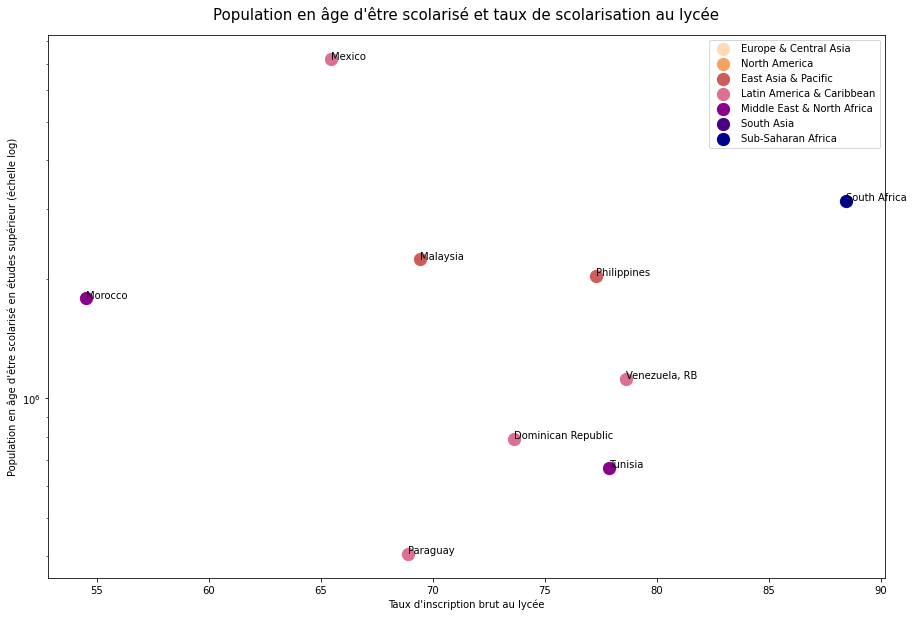

In [157]:
count = 0

fig = plt.figure(figsize=(15,10))
ax = plt.gca()
for c, g in zip(color, liste_r): 
    ax.scatter(alter_data[alter_data.Region == g]['Gross enrolment ratio, upper secondary, both sexes (%)'], alter_data[alter_data.Region == g]['Population of the official age for upper secondary education, both sexes (number)'], c=c, s=150, label=g)
    ax.set_yscale('log')
    plt.xlabel("Taux d'inscription brut au lycée")
    plt.ylabel("Population en âge d'être scolarisé en études supérieur (échelle log)")
for x,y in zip(alter_data['Gross enrolment ratio, upper secondary, both sexes (%)'], alter_data['Population of the official age for upper secondary education, both sexes (number)']):
    label = alter_data.country_name[count]
    plt.annotate(label, (x,y))
    count+=1
plt.legend()
plt.title("Population en âge d'être scolarisé et taux de scolarisation au lycée", fontsize=15, pad=15)
#plt.savefig("scatter_lycee_tx_alter_list.png", bbox_inches='tight', transparent=True)
plt.show()

In [158]:
alter_data.pivot_table(index='income_group', values='country_name', aggfunc='count', margins=True). sort_values('country_name', ascending=False)

,country_name
income_group,
All,9
Upper middle income,6
Lower middle income,3


In [159]:
liste_9 = alter_data.pivot_table(index='Region', values='country_name', aggfunc='count', margins=True). sort_values('country_name', ascending=False)
liste_9

,country_name
Region,
All,9
Latin America & Caribbean,4
East Asia & Pacific,2
Middle East & North Africa,2
Sub-Saharan Africa,1


In [160]:
liste_9 = liste_9.merge(total_liste, how='left', on='Region')

In [161]:
liste_9

,country_name_x,country_name_y
Region,,
All,9,173
Latin America & Caribbean,4,34
East Asia & Pacific,2,22
Middle East & North Africa,2,18
Sub-Saharan Africa,1,40


In [162]:
liste_9['%'] = round((liste_9.country_name_x / liste_9.country_name_y)*100,0)

In [163]:
liste_9.rename(columns={'country_name_x' : 'pays_liste', 'country_name_y' : 'total_pays'})

,pays_liste,total_pays,%
Region,,,
All,9,173,5.0
Latin America & Caribbean,4,34,12.0
East Asia & Pacific,2,22,9.0
Middle East & North Africa,2,18,11.0
Sub-Saharan Africa,1,40,2.0


In [164]:
alter_ig = ['Upper middle income', 'Lower middle income']
alter_couleur = ['seagreen', 'steelblue']

In [165]:
alter_data.country_name.unique()

array(['Dominican Republic', 'Malaysia', 'Mexico', 'Morocco', 'Paraguay',
       'Philippines', 'South Africa', 'Tunisia', 'Venezuela, RB'],
      dtype=object)

In [166]:
set(liste_short) & set(liste_alter)

set()

In [167]:
data_pays_pt['Gross enrolment ratio, upper secondary, both sexes (%)'].describe()

count    170.000000
mean      79.092378
std       35.517819
min        9.000750
25%       54.662387
50%       82.324844
75%       99.862473
max      194.101990
Name: Gross enrolment ratio, upper secondary, both sexes (%), dtype: float64

Il est a noter que les pays de la liste alter apparaissent tous dans la liste short.<br/>
Ces pays méritent une analyse approfondie.<br/><br/>

Cependant, pour une pré-analyse plus pertinente, il serait intéressant d'avoir plus d'information concernant "academy", notamment concernant les langues dans lesquelles sont dispensés les formations.<br/>

##### [sommaire](#S)